In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [83]:
df = pd.read_csv('/content/drive/MyDrive/PROJECT/Resume_project_data/car/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [84]:
df.shape

(301, 9)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [86]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [87]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [88]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [89]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

**Encoding**

In [90]:
df.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel' : 1 , 'CNG': 2 }}, inplace = True)

df.replace({'Seller_Type' : {'Dealer' : 0, 'Individual' : 1}}, inplace = True)

df.replace({'Transmission' : {'Manual' : 0, 'Automatic' : 1 }}, inplace = True)

In [91]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [92]:
x  = df.drop(["Car_Name", 'Selling_Price'], axis = 1)
y = df['Selling_Price']

In [93]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [94]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.2, random_state = 2)

**Model Training**

**Linear Regression**

In [96]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [97]:
# Prediction on training data
training_prediction = lin_reg_model.predict(x_train)

In [98]:
# R squared error
error_score = metrics.r2_score(y_train, training_prediction)
print('R square error : ',error_score)

R square error :  0.8838169193709796


**visualize the actual price and predicted**

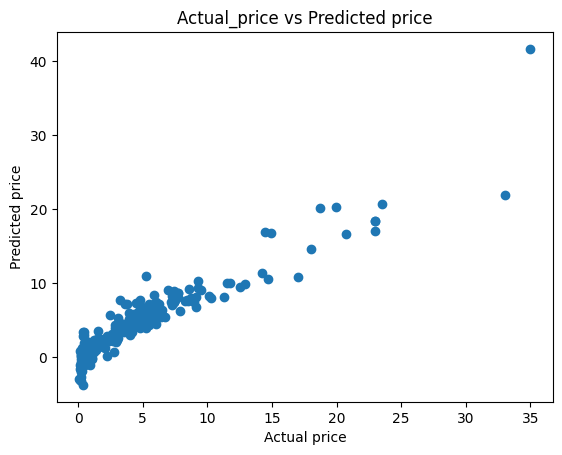

In [99]:
plt.scatter(y_train, training_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual_price vs Predicted price')
plt.show()

In [100]:
testing_prediction = lin_reg_model.predict(x_test)

In [101]:
# R squared error
error_score = metrics.r2_score(y_test, testing_prediction)
print('R square error : ',error_score)

R square error :  0.8401532365377697


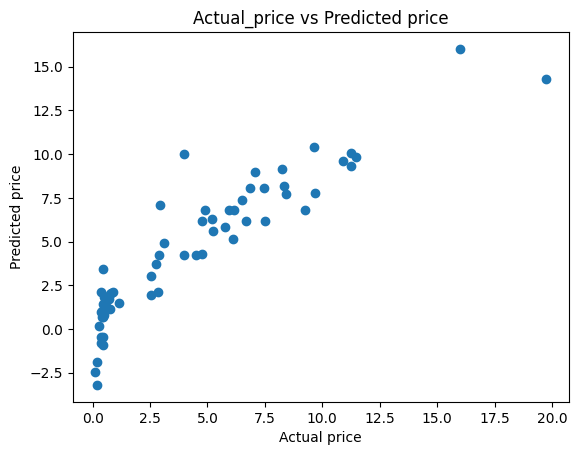

In [102]:
plt.scatter(y_test, testing_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual_price vs Predicted price')
plt.show()

**Lasso Regression**

In [103]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

In [104]:
# Prediction on training data
training_prediction = lasso_model.predict(x_train)

In [105]:
# R squared error
error_score = metrics.r2_score(y_train, training_prediction)
print('R square error : ',error_score)

R square error :  0.843587395258283


**visualize the actual price and predicted**

<function matplotlib.pyplot.show(close=None, block=None)>

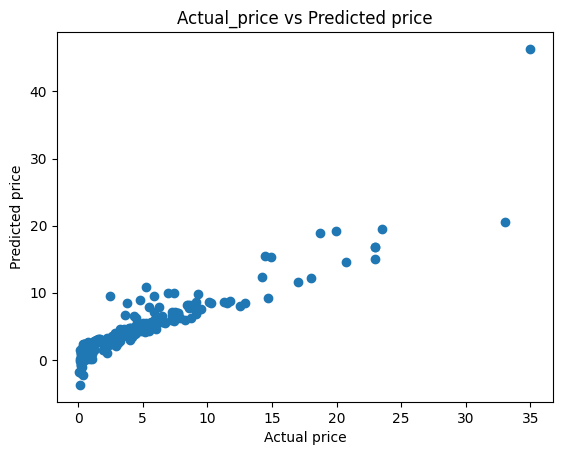

In [106]:
plt.scatter(y_train, training_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual_price vs Predicted price')
plt.show

In [107]:
testing_prediction = lasso_model.predict(x_test)

In [108]:
# R squared error
error_score = metrics.r2_score(y_test, testing_prediction)
print('R square error : ',error_score)

R square error :  0.8497457570738539


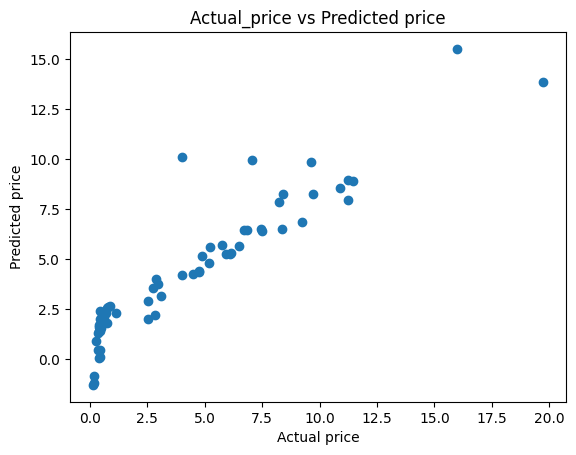

In [109]:
plt.scatter(y_test, testing_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual_price vs Predicted price')
plt.show()